In [1]:
import numpy as np
import pandas as pd
import mne
import json

with open('../sessions.json', 'r') as file:
    data = json.load(file)
    sessions = data["allsessions_prediction"]

sessions = sorted(list(set([i[:7] for i in sessions])))
sessions = [i for i in sessions if "90" not in i] # 2 adult pilots

# own colormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define custom colors
colors = ['#332288', '#ffffff', '#882155']  # Blue, white (neutral center), and red

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list('CustomRdBu', colors, N=256)




# interpret time resolved decoding results

after running the subject-wise analysis and extraction of weights via src/single_path/...interpret.py

In [2]:


patterns = []

data = np.zeros((31,351,38)) # ch x tp x sub

species="inter"
for i, session in enumerate(sessions):
    patterns.append(mne.read_evokeds(f"/ptmp/kroma/PRAWN/models/{session}/timeresolved_interpret/{species}_patterns-ave.fif")[0])
    data[:,:,i] = patterns[-1].get_data()
        


Reading /ptmp/kroma/PRAWN/models/sub-001/timeresolved_interpret/inter_patterns-ave.fif ...


    Found the data of interest:
        t =    -400.00 ...    1000.00 ms (No comment)
        0 CTF compensation matrices available
        nave = 1 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading /ptmp/kroma/PRAWN/models/sub-002/timeresolved_interpret/inter_patterns-ave.fif ...
    Found the data of interest:
        t =    -400.00 ...    1000.00 ms (No comment)
        0 CTF compensation matrices available
        nave = 1 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading /ptmp/kroma/PRAWN/models/sub-003/timeresolved_interpret/inter_patterns-ave.fif ...
    Found the data of interest:
        t =    -400.00 ...    1000.00 ms (No comment)
        0 CTF compensation matrices available
        nave = 1 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.


In [3]:
data.shape

(31, 351, 38)

In [4]:
mean_data = np.mean(data, axis=2)
median_data = np.median(data, axis=2)

In [5]:
# new evoked objects with the mean and median data

mean_evoked = mne.EvokedArray(mean_data, patterns[0].info, tmin=patterns[0].tmin)
median_evoked = mne.EvokedArray(median_data, patterns[0].info, tmin=patterns[0].tmin)

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


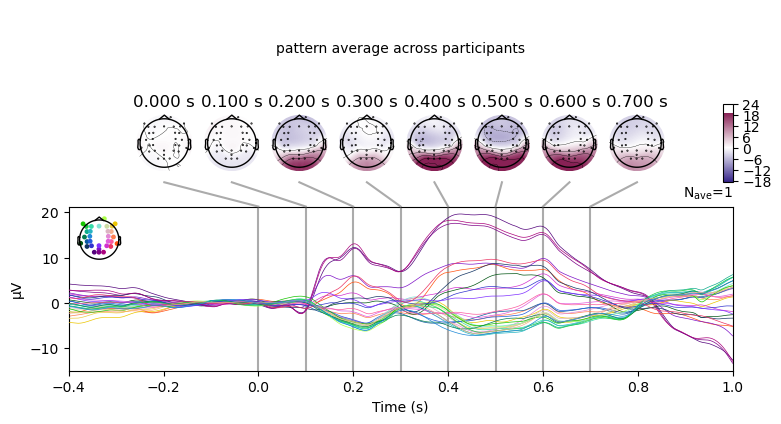

In [6]:
joint_kwargs = dict(
    ts_args=dict(time_unit="s"), 
    topomap_args=dict(time_unit="s", cmap=custom_cmap)  # Specify the custom colormap here
)
fig1 = mean_evoked.plot_joint(
        times=np.arange(0, 0.800, 0.100), title=f"pattern average across participants", **joint_kwargs
    )



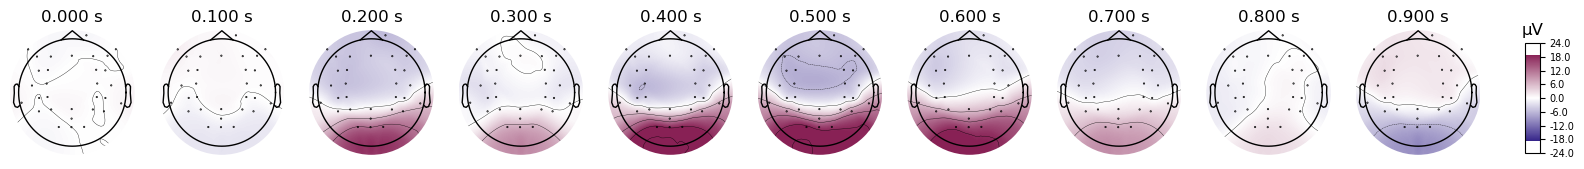

In [7]:
# Plot only the topomap using plot_topomap instead of plot_joint
fig = mean_evoked.plot_topomap(
    times=np.arange(0, 0.950, 0.100),  # The time points at which to plot topomaps
    time_unit="s",                     # Set the time unit as seconds
    cmap=custom_cmap,                  # Use your custom colormap
    #title="Topomap of Mean Evoked Response",  # Add a title to the plot
    #ncols=5                            # Specify number of columns for topomaps
)

fig.savefig(f"../plots/pattern_mean_{species}_topomap.png", dpi=300)
plt.show()  # Display the topomap


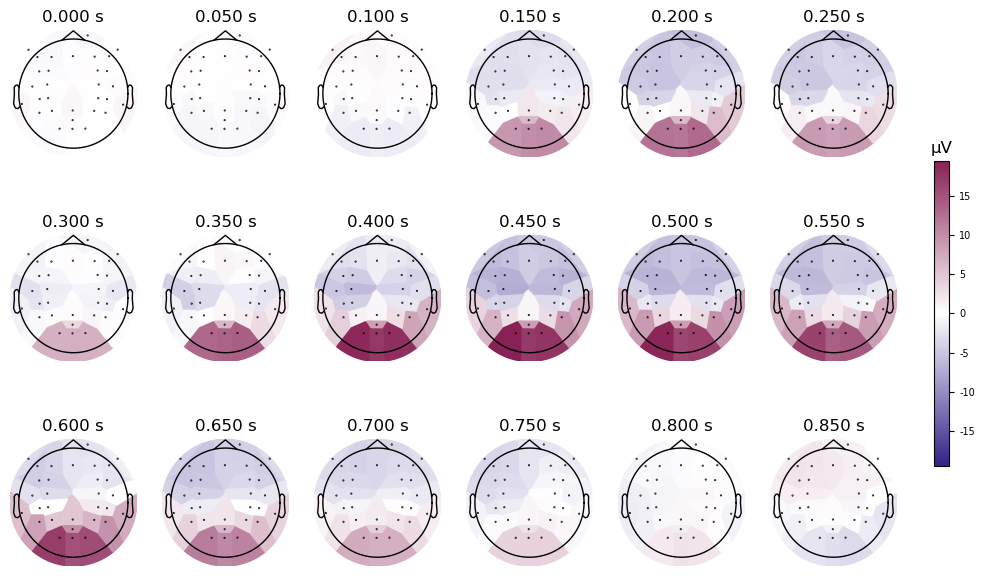

In [8]:
# LESS INTERPOLATION spatially
import matplotlib.ticker as ticker

# Plot only the topomap using plot_topomap instead of plot_joint
fig = mean_evoked.plot_topomap(
    times=np.arange(0, 0.900, 0.050),  # The time points at which to plot topomaps
    time_format="%.3f s", 
    time_unit="s",                     # Set the time unit as seconds
    cmap=custom_cmap,                  # Use your custom colormap
    cbar_fmt="%.0f", #ticker.FuncFormatter(lambda x, pos: f"{x:.0f}"),  # Format the colorbar to have 2 decimal places
    #title="Topomap of Mean Evoked Response",  # Add a title to the plot
    #ncols=5                            # Specify number of columns for topomaps
    image_interp='nearest', # nearest = NO INTERPOLATION
    extrapolate="head",
    res=32, 
    contours=0,
    ncols=6,
    nrows="auto",
)



fig.savefig(f"../plots/pattern_mean_{species}_topomap_3rows.png", dpi=300)
plt.show()  # Display the topomap
